# Exploration Data Analysis
## Centralització en l'atribut DURC

Paleta de colors utilitzada: https://coolors.co/palette/ef476f-ffd166-06d6a0-118ab2-073b4c

DURC correspon a #06D6A0

In [3]:
# dependencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
dataset = pd.read_csv('all_scenarios_train.csv')
dataset = dataset.drop('Node', axis=1)

#### Correlation
***


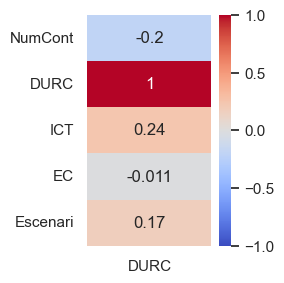

In [4]:
# aquest heatmap mostra la correlació lineal entre els diferents atributs de les dades i el DURC
plt.figure(figsize=(2,3)) 
sns.heatmap(dataset.corr()[['DURC']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

#### Deep analysis
***

In [5]:
dataset["Escenari"] = dataset["Escenari"].astype('category')
dataset[["DURC"]].describe()

# Veiem que la meitat de les entrades es troba per sota de 1.775578, tres quarts per sota del 3.288850 però el màxim
# valors de l'atribut és 49.722812

# Això fa pensar que hi ha outliers, potser algun escenari concret amb valors molt alts, però la majoria es troben 
# concentrats entre 1 i 3.288850. Tot i això, la mitjana aritmètica es troba per sobre d'aquest percentil 75, cosa que
# indica l'existència de outliers

# En qualsevol cas, si aquest atribut mostra un comportament uniforme en els diferents escenaris, llavors caldrà
# considerar si és profitós classificar amb ell.

,DURC
count,19866.000000
mean,3.332292
std,4.054604
min,0.764756
25%,1.271433
50%,1.772440
75%,3.281734
max,49.722812


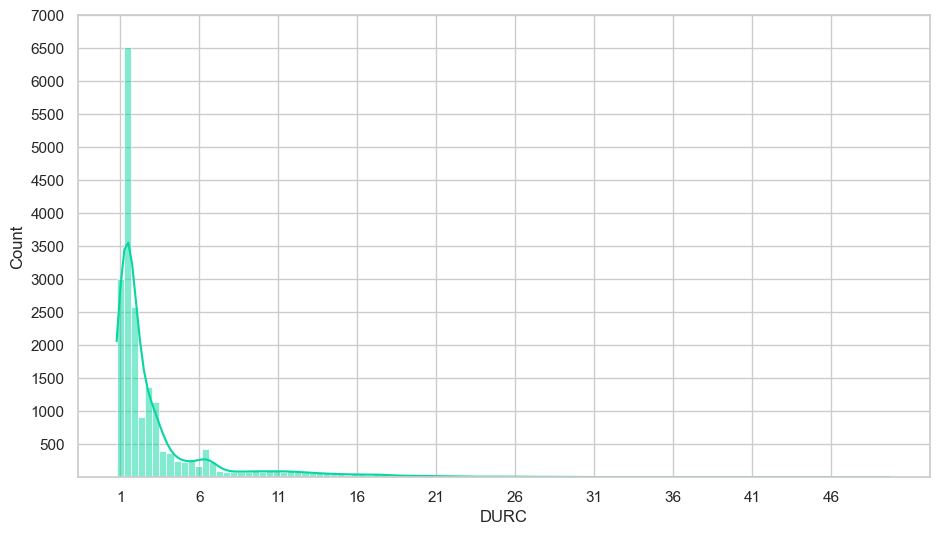

In [9]:
plt.figure(figsize=(11,6)) 
sns.histplot(data=dataset, x="DURC", kde=True, color="#06D6A0", binwidth=0.45)
ax = plt.gca()
ax.set_xticks([i for i in range(1, 51, 5)])
ax.set_yticks([i*500 for i in range(1, 15, 1)])
plt.show()

# Representació de la distribució de les dades (gràfica sobre els valors de la cel·la anterior)
# Veiem que l'histograma de l'atribut ens mostra un comportament similar a la funció e^{-x}

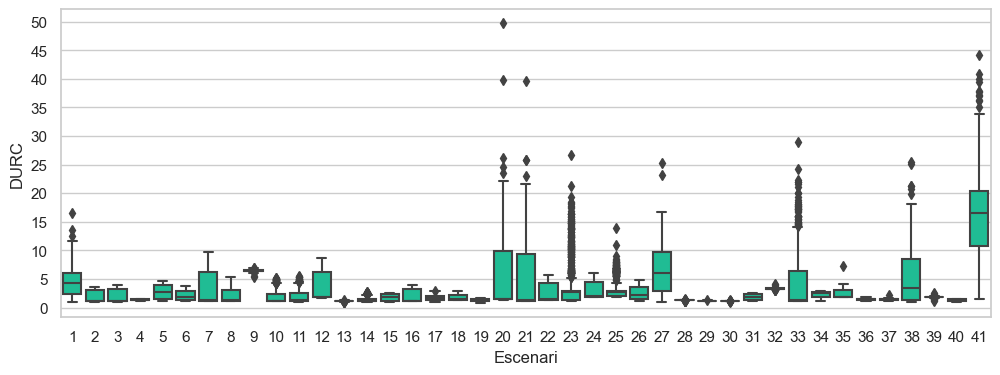

In [10]:
plt.figure(figsize=(12,4)) 
sns.boxplot(data=dataset, x="Escenari", y="DURC", color="#06D6A0", )
ax = plt.gca()
ax.set_yticks([i for i in range(0, 55, 5)])
"""
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates 
comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the 
dataset while the whiskers extend to show the rest of the distribution, except for points that are determined 
to be “outliers” using a method that is a function of the inter-quartile range.
"""
plt.show()

# Amb les distribucions per escenari, veiem que efectivament el valor màxim (49.722812) és un outlier de l'escenari 20,
# on el tercer percentil de la distribució no supera els 25.

# A més, veiem que només 8 dels 41 escenaris presenta una distribució on els seus percentils es troben per sobre de 15.
# Això representa un 19,5% dels escenaris. A més a més, només un 7% (3 en concret) dels 41 escenaris té valors per sobre
# de 30. 

# Aquest tipus valors, que són excepcions, fan que l'escala estigui descompensada. Per tant, caldrà estandaritzar les 
# dades per a tenir-les compreses entre valors de la mateixa magnitud.

#### Standarize
***

In [11]:
from sklearn import preprocessing
dataset[["DURC"]] = preprocessing.scale(dataset[["DURC"]])
dataset[["DURC"]].describe()

,DURC
count,1.986600e+04
mean,-6.867221e-17
std,1.000025e+00
min,-6.332554e-01
25%,-5.082890e-01
50%,-3.847210e-01
75%,-1.246949e-02
max,1.144173e+01


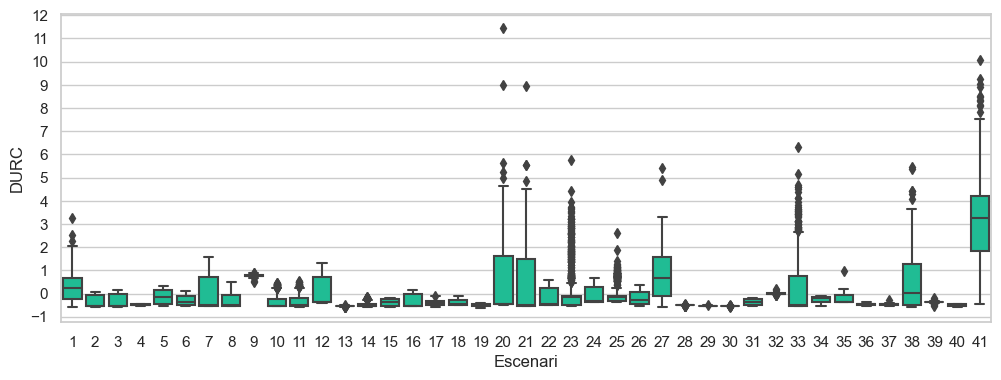

In [12]:
plt.figure(figsize=(12,4)) 
sns.boxplot(data=dataset, x="Escenari", y="DURC", color="#06D6A0", )
ax = plt.gca()
ax.set_yticks([i for i in range(-1, 13)])
"""
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates 
comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the 
dataset while the whiskers extend to show the rest of the distribution, except for points that are determined 
to be “outliers” using a method that is a function of the inter-quartile range.
"""
plt.show()

# Observem que les distribucions són les mateixes, però ara el rang de valors es compren entre -0.5754476 i 11.43161

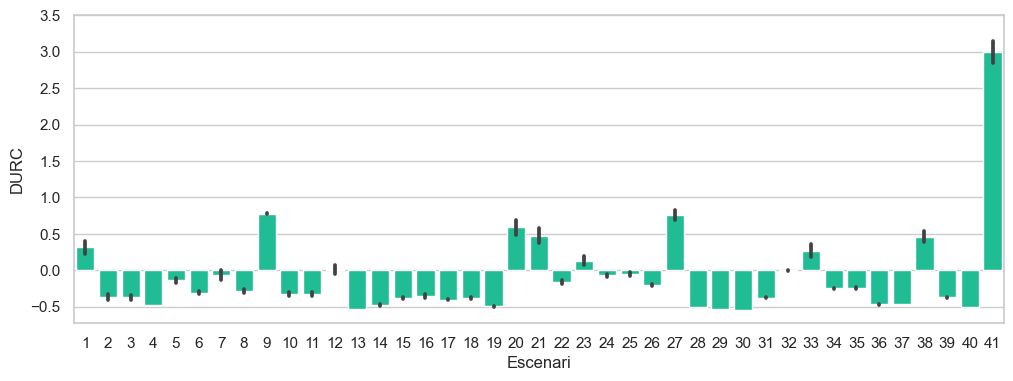

In [13]:
plt.figure(figsize=(12,4)) 
sns.barplot(data=dataset, x="Escenari", y="DURC", color="#06D6A0")
ax = plt.gca()
ax.set_yticks([i/2 for i in range(-1, 8)])
"""
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle 
and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in 
the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, 
and you want to make comparisons against it.
"""
plt.show()

# Aquí podem veure més clarament com és la tendència de cada escenari pel que fa al DURC. La majoria ara presenten
# un valor negatiu perquè originalment prenien valors molt petits. Veiem que hi ha molts escenaris amb tendències quasi
# idèntiques, pel que potser cal replantejar-se si classificar amb aquest atribut donarà bons fruits